In [2]:
import pytorch_grad_cam

/Users/admin/Documents/Github/SkinCancer/env/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [64]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
import torch
from PIL import Image
from torchvision import transforms



transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

aug = transforms.Compose([
                            # transforms.ToTensor(),
                            # transforms.ToPILImage(),
                            transforms.RandomHorizontalFlip(),  # Random horizontal flip
                            transforms.RandomVerticalFlip(),  # Random vertical flip
                            transforms.RandomRotation(200),
                            # transforms.RandomPerspective(),
                            # transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=15),  # Random affine transformation
                            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Color jitter
                            transforms.RandomGrayscale(p=0.5),  # Randomly convert to grayscale
                            transforms.Resize((224,224)),
                            # transforms.ToTensor(),
                            # transforms.Normalize([0.5], [0.5])
                            ])

model = resnet50(pretrained=False, num_classes=7)
model_path = '../models/ResNet_original_5Epochs.pth'
# model_path = '../models/ResNet-10Epochs-50.pth'
model.load_state_dict(torch.load(model_path))
target_layers = [model.layer4[-1]]

image = Image.open("../data/HAM10k/HAM10000_images/ISIC_0024307.jpg")
image_aug = aug(image)
input_tensor = transform(image) # Create an input tensor image for your model..
input_tensor = input_tensor.unsqueeze(0)

print(input_tensor.shape)
# Note: input_tensor can be a batch tensor with several images!

# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=False)

# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...

# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.

targets = [ClassifierOutputTarget(0)]

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
# visualization = show_cam_on_image(image, grayscale_cam, use_rgb=True)

/Users/admin/Documents/Github/SkinCancer/env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/admin/Documents/Github/SkinCancer/env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


torch.Size([1, 3, 224, 224])


Original image shape: (600, 450)


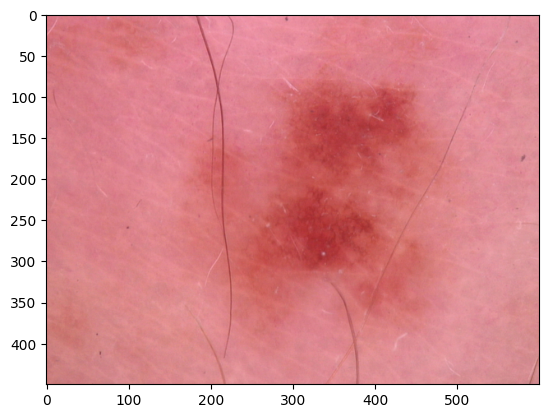

GradCAM image shape: (224, 224)


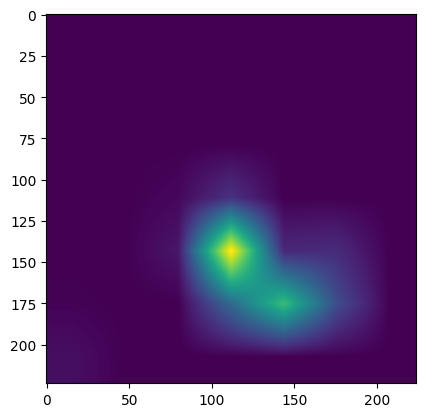

In [70]:
# Visualization

import matplotlib.pyplot as plt
print(f'Original image shape: {image.size}')
plt.imshow(image)
plt.show()

print(f'GradCAM image shape: {grayscale_cam.shape}')
plt.imshow(grayscale_cam)
plt.show()
